# Text Mining The New York Times' Online Articles

Before starting, make sure to read the 'Considerations and Constraints' section on the repository's README file [here](https://github.com/nilmolne/Text-Mining-The-New-York-Times-Articles#constraints).

Along this Jupyter Notebook you will find how to use the algorithm's functions in the repository together with brief explanations of some key concepts on text mining. For further detail on the implementation of the algorithm's functions, please refer to *textminingnyt.py* file [here](https://github.com/nilmolne/Text-Mining-The-New-York-Times-Articles/blob/master/Code/textminingnyt.py).

To get ready to mine text from the NYT online articles, first call the *textminingnyt* module which contains all necessary functions and libraries that will be used later on. Make sure to have installed under your Python environment the following libraries: *NumPy, Pandas, Time, NLTK, Re, Requests, *and* BeautifulSoup*.

In [5]:
from textminingnyt import *

Initialize the main variable used by all functions in the *textminingnyt* module to display each stage results. Note that functions are thought to be run sequentially following the order that this notebook does. The variable 'articles_df' will get overwritten step after step.

In [6]:
articles_df = pd.DataFrame()

## 0 Customize Search Scope

Choose the country in which you want to base your analysis on, and a yearly time range that potentially spans the events you are looking for. The words specified in the dictionary will be mined from the articles and reported in form of a frequency of occurrence over the time of exploration on a monthly basis.

In [7]:
start_year = 2002
end_year = 2015
country = 'Sweden'
dictionary = 'Vote, Ballot, Poll'

This example will look for the words **vote**, **ballot** and **poll** over the articles published as geolocated in **Sweden** from the year **2002** through **2015**. When visualizing the results in the end of text mining process, a high frequency of occurrence is expected only in times of election.

## 1 Build URL Article Database

The New York Times offers developers up to 11 search APIs to retrieve certain information for different uses. For this project's purposes, only the Article Search API will be used. All the programmer needs to do to access it is to request an API key and install the *nytimesarticle* package which is wrapper to query the New York Times Article Search API.

*The API key can be requested at: http://developer.nytimes.com/signup*

*The nytimesarticle package can be downloaded from: https://pypi.python.org/pypi/nytimesarticle/0.1.0*

With the Article Search API, one can search New York Times articles from September 18, 1851 to today, retrieving the URL to the articles, plus their headlines, abstracts, lead paragraphs, associated multimedia, and other article metadata. 

In [9]:
#api = articleAPI('Your API key here')

# Get Article URL List
articles_df = get_articles_url(api, country, start_year, end_year)
articles_df.tail()

 Retrieving articles URL... Done!


,date,url,word_count
144,2015-11-11,https://www.nytimes.com/2015/11/11/world/europ...,1183
145,2015-11-13,https://www.nytimes.com/2015/11/13/world/europ...,893
146,2015-11-16,https://www.nytimes.com/2015/11/16/world/europ...,1387
147,2015-11-28,https://www.nytimes.com/2015/11/28/world/europ...,1147
148,2015-12-25,https://www.nytimes.com/2015/12/25/world/europ...,1254


As a result, the function returns a dataframe where each row represents an article and contains its publishing date, url to the full article and number of words. **Notice that the API does not return full body text of the articles**. Nevertheless, the URLs to the articles can conceivably be used to scrape the full text of the articles of interest, on a later stage.

## 2 Scarp Article Content

Given the corpus of article URLs in *articles_df* the user wants to analyze; the next step is to extract each article's body text from its HTML form. HTML provides a means to create structured documents by denoting structural semantics for text such as headings, paragraphs, lists, links, quotes and other items. These elements are delineated by tags.

Analyzing many online articles, it was found that developers in the NYT locate article body text under **p tags of class “story-body-text story-content”** or on earlier published articles under **p tags with an itemprop called “articleBody”**. The scarping of such p tags is carried out by BeautifulSoup. Headliners, commercials, and others are stored in different tags.

In [10]:
# Get Article Text
articles_df = scarp_articles_text(articles_df)
articles_df.tail()

Scarping articles body text... Done!


,date,url,word_count,article_text
144,2015-11-11,https://www.nytimes.com/2015/11/11/world/europ...,1183,"LONDON — Matthew Barzun, the American ambass..."
145,2015-11-13,https://www.nytimes.com/2015/11/13/world/europ...,893,"VALLETTA, Malta — The European Union appeare..."
146,2015-11-16,https://www.nytimes.com/2015/11/16/world/europ...,1387,"RAASEPORI, Finland — Sweden, Norway, Denmark..."
147,2015-11-28,https://www.nytimes.com/2015/11/28/world/europ...,1147,LONDON — It may seem an inopportune time to s...
148,2015-12-25,https://www.nytimes.com/2015/12/25/world/europ...,1254,"FORSSA, Finland — War in Syria and Iraq seem..."


After calling the function *scarp_articles_text()*, the *articles_df* dataframe is expanded by adding a new string type of column that includes all articles' body text for each article URL collected in step 1.

## 3 Text Mine Articles

#### Analytical Article Pre-processing

Once the body text of each article was scarped, the next step is to transform it into a format amenable to analysis, o in other words, break each article's body text into tokens. Tokenize involves representing text as a list of words, numbers, punctuation, and potentially other symbols, which will become the input for the count of words. The result of a tokenization of an article's body text is the so-called **bag of words**.

A key aspect of text mining is to reduce the dimensionality of bag of words representations to eliminate ‘noise’ to highlight only the articles’ distinctive content. The actions taken to get rid of superfluous content are performed by NLTK library functions and are listed below:

1.	Remove punctuation and rare words: ‘In’, ‘at’, ‘the, ‘a’ … are extremely common words but contribute little to distinguishing the content of an article from another. These so-called stop-words are dropped from the bag.

2.	Stemming: It translates to cutting off affixes to be able to restrict the counting in the next step just to stems. For example, the word ‘censoring’ contains the stem ‘censor’ and the affix ‘-ing’. Therefore, ‘censoring’ and ‘censor’ once stemmed are treated as two instances of the same token.

3.	Case folding: It involves converting all alphabetic tokens to lowercase. In some cases, though, this might change meaning for some nouns. For example, an acronym such as ‘US’ (referring to the United States) is erroneously converted to the pronoun ‘us’. This function doesn't take care of this issue.

#### Word Count

To count words, the algorithm's function is going to use a dictionary text mining technique. Generally, all of the text mining techniques are based on text content analysis to summarize what texts are about. The intuition behind any dictionary text mining technique is that the frequency of words and their occurrence are good indicators of the topic or sentiment expressed in texts.

Dictionary techniques typically proceed in two steps:

1.	Start by defining a list of key words to capture content of interest as done in the step 0,

2.	Then represent each document in terms of the frequency of words in the dictionary.

Continuing with the example, let the dictionary be [Vote, Ballot, Poll]. Each article *a* can be represented as the share of words *S_a* in the dictionary that were found in the article’s bag of words, where,

<center><img src = "Formula.png" width = 600px height = 600px></center>

Equation 1.1 is called **article's *a* frequency of occurrence**.

In [12]:
# Article pre-processing and word count
articles_df = text_mine_articles(articles_df, dictionary)
articles_df.tail()

Text mine articles... Done!


,date,url,word_count,article_text,num_occurr,freq_occurr
144,2015-11-11,https://www.nytimes.com/2015/11/11/world/europ...,1183,"LONDON — Matthew Barzun, the American ambass...",1,0.000845
145,2015-11-13,https://www.nytimes.com/2015/11/13/world/europ...,893,"VALLETTA, Malta — The European Union appeare...",0,0.000000
146,2015-11-16,https://www.nytimes.com/2015/11/16/world/europ...,1387,"RAASEPORI, Finland — Sweden, Norway, Denmark...",3,0.002163
147,2015-11-28,https://www.nytimes.com/2015/11/28/world/europ...,1147,LONDON — It may seem an inopportune time to s...,7,0.006103
148,2015-12-25,https://www.nytimes.com/2015/12/25/world/europ...,1254,"FORSSA, Finland — War in Syria and Iraq seem...",0,0.000000


By calling *text_mine_articles()* the function will add as columns to *articles_df* the number of counted occurrences for every word in the dictionary and compute each article's frequency of occurrence dividing the number of occurrences by the amount of words in the article as seen in equation 1.1 above.

## 4 Present Results

Articles in The New York Times are published on a given day whereas many events of interest are defined monthly, quarterly or even yearly. As a consequence, the results obtained on the previous step have to be normalized and expressed in monthly, quarterly or yearly terms.

In [13]:
# Build the Resulting Monthly Time Series
results_df = get_monthly_results(articles_df, start_year, end_year)
results_df.tail()

Arranging results monthly into a new dataframe... Done!


,month_freq_occurr,num_articles,norm_freq_occurr
date,,,
2015-08-31,0.000763,4.0,0.000191
2015-09-30,0.001577,4.0,0.000394
2015-10-31,0.001205,4.0,0.000301
2015-11-30,0.009111,6.0,0.001519
2015-12-31,0.000000,1.0,0.000000


The algorithm is set to present results monthly. As a consequence, all calculated frequencies of occurrence for each article within a month, for all months analyzed, are first accumulated to give a monthly frequency of occurrence. After, this monthly added frequency is normalized by the amount of published articles in its month. The former calculation is found under the column '*month_freq_occurr*' whereas the latter is found under '*norm_freq_occurr*'.

## 5 Visualize Results

Once the previous 4 functions have been successfully called, the results are ready to be checked by means of a plot.

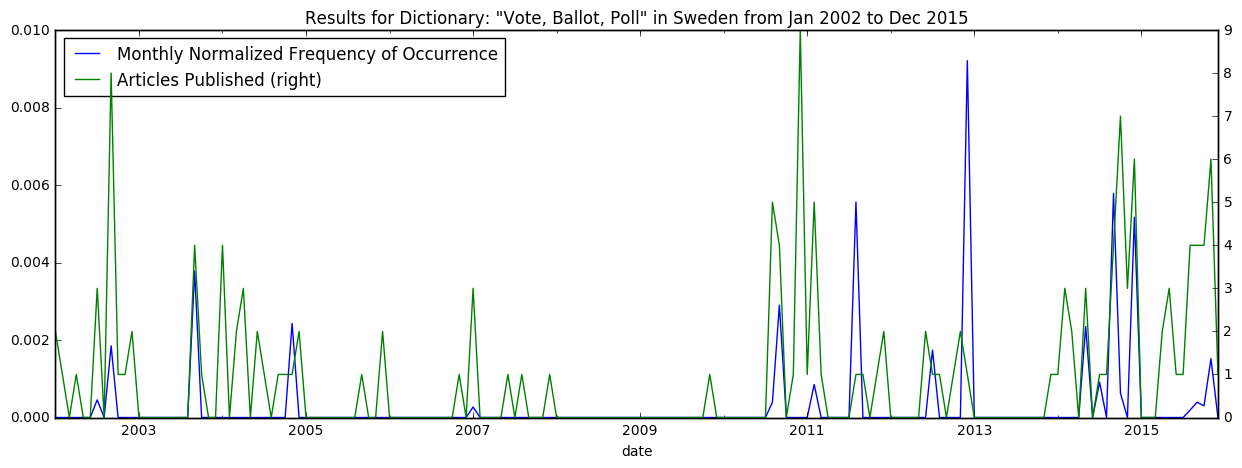

In [14]:
# Visualize Results
visualize_results(results_df, country, start_year, end_year, dictionary)

Observe how frequencies of occurrence (represented in blue) typically exceed the 0.002 mark only when Sweden have held any kind of election (starting with the general election in September 2002) or referendum (big peak in September 2003). You can double check it at the bottom of [this Wikipedia page](https://en.wikipedia.org/wiki/Elections_in_Sweden).

## Conclusion

This text mining technique is only a deductive approach in that it starts with a predefined list of words, motivated by a general theory as to why these words matter. The strengths of this approach are simplicity and scalability. Code for its implementation is typically simple, and can be applied easily to massive text files. However, the weakness of this approach is its focus only on words pre-judged by the researcher to be informative while ignoring all other words.

Some other more advanced approaches such as Latent Semantic Analysis, Latent Dirichlet Allocation and Descending Hierarchical Classification look for thematic patterns in a particular corpus without claiming that these patterns hold in other documents. The main strength of these techniques is that they analyze all words within the corpus and yield more sophisticated statistical outputs. Their main disadvantage is programming complexity.

## References

[1] Liran Einav and Jonathan Levin, Economics in the age of big data, *Science 346*, (2014).

[2] Bank of England, One Bank Research Agenda, *Pages 23-29*, (2005).

[3] Bank of England, Using Internet Search Data as Economic Indicators, *Bulletin Q2*, (2011).